In [35]:
from scipy.integrate import odeint
from math import sqrt,factorial
import numpy as np
import matplotlib.pyplot as plt

atol = 1e-12
rtol = 1e-12
nxhigh = 100000
epshorizon = 1e-8
rlarge = 40

In [36]:
def rhs(y,r,ls):
    
    alpha,zeta,Q,phi = y
    
    
    dalphadr = -0.5*(alpha*(pow(r,7)*pow(Q,2) - 24*pow(ls,2)*pow(r,6)*pow(Q,3) + 192*pow(ls,4)*pow(r,5)*pow(Q,4) - 512*pow(ls,6)*pow(r,4)*pow(Q,5) - 16*pow(ls,2)*pow(r,4)*Q*pow(zeta,2) + 384*pow(ls,4)*pow(r,3)*pow(Q,2)*pow(zeta,2) - pow(r,7)*pow(Q,2)*pow(zeta,2) - 3072*pow(ls,6)*pow(r,2)*pow(Q,3)*pow(zeta,2) + 52*pow(ls,2)*pow(r,6)*pow(Q,3)*pow(zeta,2) + 8192*pow(ls,8)*r*pow(Q,4)*pow(zeta,2) - 664*pow(ls,4)*pow(r,5)*pow(Q,4)*pow(zeta,2) + 2496*pow(ls,6)*pow(r,4)*pow(Q,5)*pow(zeta,2) + 8*pow(ls,2)*pow(r,4)*Q*pow(zeta,4) - 896*pow(ls,4)*pow(r,3)*pow(Q,2)*pow(zeta,4) + 12032*pow(ls,6)*pow(r,2)*pow(Q,3)*pow(zeta,4) - 28*pow(ls,2)*pow(r,6)*pow(Q,3)*pow(zeta,4) - 43008*pow(ls,8)*r*pow(Q,4)*pow(zeta,4) + 752*pow(ls,4)*pow(r,5)*pow(Q,4)*pow(zeta,4) - 4416*pow(ls,6)*pow(r,4)*pow(Q,5)*pow(zeta,4) - 96*pow(ls,4)*r*pow(zeta,6) + 768*pow(ls,6)*Q*pow(zeta,6) + 480*pow(ls,4)*pow(r,3)*pow(Q,2)*pow(zeta,6) - 15104*pow(ls,6)*pow(r,2)*pow(Q,3)*pow(zeta,6) + 83968*pow(ls,8)*r*pow(Q,4)*pow(zeta,6) - 280*pow(ls,4)*pow(r,5)*pow(Q,4)*pow(zeta,6) + 3392*pow(ls,6)*pow(r,4)*pow(Q,5)*pow(zeta,6) - 768*pow(ls,6)*Q*pow(zeta,8) + 6144*pow(ls,6)*pow(r,2)*pow(Q,3)*pow(zeta,8) - 72192*pow(ls,8)*r*pow(Q,4)*pow(zeta,8) - 960*pow(ls,6)*pow(r,4)*pow(Q,5)*pow(zeta,8) + 23040*pow(ls,8)*r*pow(Q,4)*pow(zeta,10)))/((-1 + pow(zeta,2))*(r - 8*pow(ls,2)*Q + 12*pow(ls,2)*Q*pow(zeta,2))*(pow(r,5) - 24*pow(ls,2)*pow(r,4)*Q + 192*pow(ls,4)*pow(r,3)*pow(Q,2) - 512*pow(ls,6)*pow(r,2)*pow(Q,3) + 28*pow(ls,2)*pow(r,4)*Q*pow(zeta,2) - 480*pow(ls,4)*pow(r,3)*pow(Q,2)*pow(zeta,2) + 2048*pow(ls,6)*pow(r,2)*pow(Q,3)*pow(zeta,2) - 96*pow(ls,4)*r*pow(zeta,4) + 768*pow(ls,6)*Q*pow(zeta,4) + 288*pow(ls,4)*pow(r,3)*pow(Q,2)*pow(zeta,4) - 2496*pow(ls,6)*pow(r,2)*pow(Q,3)*pow(zeta,4) - 768*pow(ls,6)*Q*pow(zeta,6) + 960*pow(ls,6)*pow(r,2)*pow(Q,3)*pow(zeta,6)))
    
    dzetadr = -0.25*(r*(-(pow(r,5)*pow(Q,2)) + 16*pow(ls,2)*pow(r,4)*pow(Q,3) - 64*pow(ls,4)*pow(r,3)*pow(Q,4) + 2*pow(r,3)*pow(zeta,2) - 384*pow(ls,4)*r*pow(Q,2)*pow(zeta,2) + pow(r,5)*pow(Q,2)*pow(zeta,2) + 2048*pow(ls,6)*pow(Q,3)*pow(zeta,2) - 32*pow(ls,2)*pow(r,4)*pow(Q,3)*pow(zeta,2) + 208*pow(ls,4)*pow(r,3)*pow(Q,4)*pow(zeta,2) + 16*pow(ls,2)*pow(r,2)*Q*pow(zeta,4) + 864*pow(ls,4)*r*pow(Q,2)*pow(zeta,4) - 7680*pow(ls,6)*pow(Q,3)*pow(zeta,4) + 16*pow(ls,2)*pow(r,4)*pow(Q,3)*pow(zeta,4) - 224*pow(ls,4)*pow(r,3)*pow(Q,4)*pow(zeta,4) - 480*pow(ls,4)*r*pow(Q,2)*pow(zeta,6) + 9472*pow(ls,6)*pow(Q,3)*pow(zeta,6) + 80*pow(ls,4)*pow(r,3)*pow(Q,4)*pow(zeta,6) - 3840*pow(ls,6)*pow(Q,3)*pow(zeta,8)))/(zeta*(pow(r,5) - 24*pow(ls,2)*pow(r,4)*Q + 192*pow(ls,4)*pow(r,3)*pow(Q,2) - 512*pow(ls,6)*pow(r,2)*pow(Q,3) + 28*pow(ls,2)*pow(r,4)*Q*pow(zeta,2) - 480*pow(ls,4)*pow(r,3)*pow(Q,2)*pow(zeta,2) + 2048*pow(ls,6)*pow(r,2)*pow(Q,3)*pow(zeta,2) - 96*pow(ls,4)*r*pow(zeta,4) + 768*pow(ls,6)*Q*pow(zeta,4) + 288*pow(ls,4)*pow(r,3)*pow(Q,2)*pow(zeta,4) - 2496*pow(ls,6)*pow(r,2)*pow(Q,3)*pow(zeta,4) - 768*pow(ls,6)*Q*pow(zeta,6) + 960*pow(ls,6)*pow(r,2)*pow(Q,3)*pow(zeta,6)))
    
    dQdr = (2*pow(r,4)*Q - 48*pow(ls,2)*pow(r,3)*pow(Q,2) + 384*pow(ls,4)*pow(r,2)*pow(Q,3) - 1024*pow(ls,6)*r*pow(Q,4) - pow(ls,2)*pow(r,5)*pow(Q,4) + 8*pow(ls,4)*pow(r,4)*pow(Q,5) - pow(r,4)*Q*pow(zeta,2) + 100*pow(ls,2)*pow(r,3)*pow(Q,2)*pow(zeta,2) - 1408*pow(ls,4)*pow(r,2)*pow(Q,3)*pow(zeta,2) + 5376*pow(ls,6)*r*pow(Q,4)*pow(zeta,2) + 2*pow(ls,2)*pow(r,5)*pow(Q,4)*pow(zeta,2) - 16*pow(ls,4)*pow(r,4)*pow(Q,5)*pow(zeta,2) + 12*pow(ls,2)*r*pow(zeta,4) - 96*pow(ls,4)*Q*pow(zeta,4) - 48*pow(ls,2)*pow(r,3)*pow(Q,2)*pow(zeta,4) + 1696*pow(ls,4)*pow(r,2)*pow(Q,3)*pow(zeta,4) - 10496*pow(ls,6)*r*pow(Q,4)*pow(zeta,4) - pow(ls,2)*pow(r,5)*pow(Q,4)*pow(zeta,4) + 8*pow(ls,4)*pow(r,4)*pow(Q,5)*pow(zeta,4) + 96*pow(ls,4)*Q*pow(zeta,6) - 672*pow(ls,4)*pow(r,2)*pow(Q,3)*pow(zeta,6) + 9024*pow(ls,6)*r*pow(Q,4)*pow(zeta,6) - 2880*pow(ls,6)*r*pow(Q,4)*pow(zeta,8))/((-1 + pow(zeta,2))*(pow(r,5) - 24*pow(ls,2)*pow(r,4)*Q + 192*pow(ls,4)*pow(r,3)*pow(Q,2) - 512*pow(ls,6)*pow(r,2)*pow(Q,3) + 28*pow(ls,2)*pow(r,4)*Q*pow(zeta,2) - 480*pow(ls,4)*pow(r,3)*pow(Q,2)*pow(zeta,2) + 2048*pow(ls,6)*pow(r,2)*pow(Q,3)*pow(zeta,2) - 96*pow(ls,4)*r*pow(zeta,4) + 768*pow(ls,6)*Q*pow(zeta,4) + 288*pow(ls,4)*pow(r,3)*pow(Q,2)*pow(zeta,4) - 2496*pow(ls,6)*pow(r,2)*pow(Q,3)*pow(zeta,4) - 768*pow(ls,6)*Q*pow(zeta,6) + 960*pow(ls,6)*pow(r,2)*pow(Q,3)*pow(zeta,6)))
    
    dphidr = Q
    
    dydt = np.array([dalphadr, dzetadr, dQdr, dphidr])

    return dydt
    

In [37]:
def get_ic(eps,ls):
    
    alpha0 = 0.5
    
    phi1 = (-1 + sqrt(1 - 192*pow(ls,4)))/(8.*pow(ls,2))
    
    s1 = -0.5*1/(1 + 4*pow(ls,2)*phi1)
    
    alpha1 = (alpha0*(12*pow(ls,2) - 2496*pow(ls,6) + phi1 - 64*pow(ls,4)*phi1 - 768*pow(ls,8)*phi1 + 4*pow(ls,2)*pow(phi1,2) + 1280*pow(ls,8)*pow(phi1,3) + 1024*pow(ls,10)*pow(phi1,4)))/(8.*pow(ls,2)*(-1 + 96*pow(ls,4) - 4*pow(ls,2)*phi1)*(1 + 4*pow(ls,2)*phi1))
    
    s2 = (6*pow(ls,2) - 3744*pow(ls,6) + 69120*pow(ls,10) + phi1 - 240*pow(ls,4)*phi1 + 55296*pow(ls,12)*phi1 - 16*pow(ls,4)*pow(phi1,3) + 2688*pow(ls,8)*pow(phi1,3))/(8.*pow(ls,2)*(-1 + 96*pow(ls,4) - 4*pow(ls,2)*phi1)*pow(1 + 4*pow(ls,2)*phi1,3))
    
    phi2 = (-84*pow(ls,2) - phi1 - 48*pow(ls,4)*phi1 + 80*pow(ls,4)*pow(phi1,3) + 64*pow(ls,6)*pow(phi1,4))/(2.*(-1 + 96*pow(ls,4) - 4*pow(ls,2)*phi1))
    
    alpha = 0.5 + alpha1*eps
    
    zeta = 1 + eps*s1 + eps*eps*0.5*s2
    
    Q = phi1 + eps*phi2
    
    phi = 0.1 + eps*phi1 + eps*eps*0.5*phi2
    
    return np.array([alpha,zeta,Q,phi])

In [38]:
def solve_ODE_scaled(r_arr,eps,ls):

    assert r_arr[0] == 1 + eps, "Starting point is not the same as initial grid size eps"

    y0 = get_ic(eps,ls)

    sol =  odeint(rhs, y0, r_arr,args = (ls,),atol=atol,rtol=rtol,hmax = 1e-2)

    return sol

In [39]:
def solve_rescale(ls):
    r_arr = np.linspace(1+epshorizon,rlarge,nxhigh)
    sol = solve_ODE_scaled(r_arr,epshorizon,ls).T
    
    Q = sol[-2]
    phiasym = sol[-1][-1]
    
    phi = sol[-1] - phiasym
    
    return r_arr,Q,phi
    
    

In [40]:
solve_rescale(0.1)

(array([ 1.00000001,  1.00039001,  1.00078002, ..., 39.99921999,
        39.99961   , 40.        ]),
 array([-1.20581593e-01, -1.20439483e-01, -1.20297611e-01, ...,
        -2.56425544e-05, -2.56420479e-05, -2.56415415e-05]),
 array([7.24412774e-02, 7.23942778e-02, 7.23473336e-02, ...,
        2.00009974e-08, 1.00003999e-08, 0.00000000e+00]))

In [20]:
def r_of_x(x,cl=100):
    r = x/(1 - pow(x,2)/pow(cl,2))
    return r

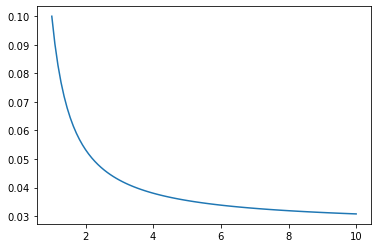

In [22]:
plt.plot(np.linspace(1+1e-6,10,100), sol[:,-1])